## Hyperopt

### Iris 数据集

在本节中，我们将介绍4个使用hyperopt在经典数据集 Iris 上调参的完整示例。我们将涵盖 K 近邻（KNN），支持向量机（SVM），决策树和随机森林。

对于这项任务，我们将使用经典的Iris数据集，并进行一些有监督的机器学习。数据集有有4个输入特征和3个输出类别。数据被标记为属于类别0，1或2，其映射到不同种类的鸢尾花。输入有4列：萼片长度，萼片宽度，花瓣长度和花瓣宽度。输入的单位是厘米。我们将使用这4个特征来学习模型，预测三种输出类别之一。因为数据由sklearn提供，它有一个很好的DESCR属性，可以提供有关数据集的详细信息。尝试以下代码以获得更多细节信息


In [1]:
from sklearn import datasets
iris = datasets.load_iris()


print(iris.feature_names) # input names
print(iris.target_names) # output names
print(iris.DESCR) # everything else

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high

### K-means

我们现在将使用hyperopt来找到 K近邻（KNN）机器学习模型的最佳参数。KNN 模型是基于训练数据集中 k 个最近数据点的大多数类别对来自测试集的数据点进行分类。

In [2]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
from math import *
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 数据集导入
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 损失函数
def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X, y).mean()


# hp.choice(label, options) 其中options应是 python 列表或元组
# space4nn就是需要输入到损失函数里面的参数
space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,100))
}

# 定义目标函数
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

# Trials对象允许我们在每个时间步存储信息
trials = Trials()

# 函数fmin首先接受一个函数来最小化，algo参数指定搜索算法，最大评估次数max_evals
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:',best)
print('trials:')

for trial in trials.trials[:2]:
    print(trial)

100%|█| 100/100 [00:02<00:00, 34.95it/s, best loss: -0.98000000
best: {'n_neighbors': 11}
trials:
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.9666666666666668, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'n_neighbors': [0]}, 'vals': {'n_neighbors': [7]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 11, 10, 8, 0, 48, 790000), 'refresh_time': datetime.datetime(2020, 11, 10, 8, 0, 48, 814000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': -0.6599999999999999, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'n_neighbors': [1]}, 'vals': {'n_neighbors': [86]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 11, 10, 8, 0, 48, 883000), 'refresh_time': datetime.datetime(2020, 11, 10, 8, 0, 48, 912000)}


现在让我们看看输出结果的图。y轴是交叉验证分数，x轴是 k 近邻个数。下面是代码和它的图像：

Text(0, 0.5, 'cross validation accuracy')

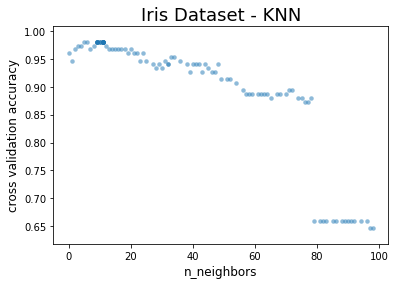

In [3]:
f, ax = plt.subplots(1) #, figsize=(10,10))
xs = [t['misc']['vals']['n_neighbors'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('Iris Dataset - KNN', fontsize=18)
ax.set_xlabel('n_neighbors', fontsize=12)
ax.set_ylabel('cross validation accuracy', fontsize=12)

k大于63后，精度会急剧下降。 这是由于数据集中每个类只有50个实例。 因此，让我们通过将“ n_neighbors”的值限制为较小的值来进行深入研究。

In [4]:
def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,50))
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)

100%|█| 100/100 [00:02<00:00, 38.21it/s, best loss: -0.98000000
best:
{'n_neighbors': 5}


Text(0, 0.5, 'cross validation accuracy')

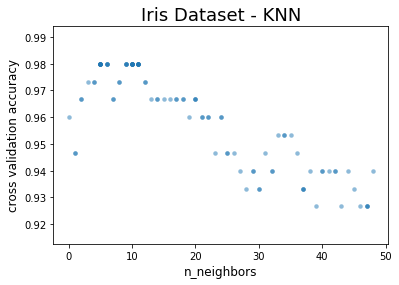

In [5]:
f, ax = plt.subplots(1) #, figsize=(10,10))
xs = [t['misc']['vals']['n_neighbors'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('Iris Dataset - KNN', fontsize=18)
ax.set_xlabel('n_neighbors', fontsize=12)
ax.set_ylabel('cross validation accuracy', fontsize=12)

上面的模型没有做任何预处理。所以我们来归一化和缩放特征，看看是否有帮助。用如下代码：

In [6]:
# 归一化和缩放特征
from sklearn.preprocessing import normalize, scale

iris = datasets.load_iris()
X = iris.data
y = iris.target

def hyperopt_train_test(params):
    X_ = X[:]

    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
        del params['normalize']

    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
        del params['scale']

    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X_, y).mean()

space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,50)),
    'scale': hp.choice('scale', [0, 1]),
    'normalize': hp.choice('normalize', [0, 1])
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:',best)

100%|█| 100/100 [00:02<00:00, 34.37it/s, best loss: -0.98000000
best: {'n_neighbors': 3, 'normalize': 1, 'scale': 0}


绘制参数

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


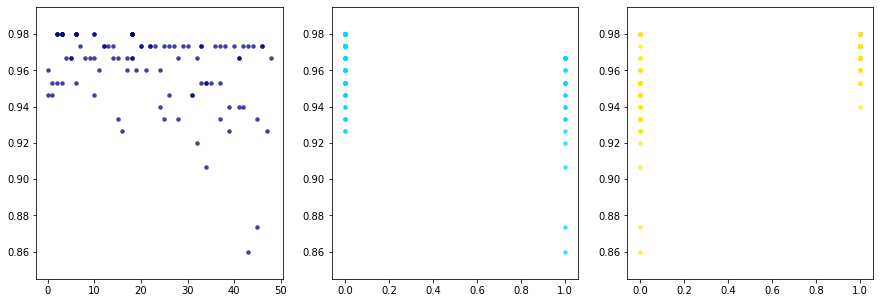

In [7]:
parameters = ['n_neighbors', 'scale', 'normalize']
cols = len(parameters)
f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(15,5))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75, c=cmap(float(i)/len(parameters)))

### 支持向量机（SVM）

由于这是一个分类任务，我们将使用sklearn的SVC类。代码如下：

In [8]:
from sklearn.svm import SVC


def hyperopt_train_test(params):
    X_ = X[:]

    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
        del params['normalize']

    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
        del params['scale']

    clf = SVC(**params)
    return cross_val_score(clf, X_, y).mean()

# SVM模型有两个非常重要的参数C与gamma。其中 C是惩罚系数，即对误差的宽容度。
# c越高，说明越不能容忍出现误差,容易过拟合。C越小，容易欠拟合。C过大或过小，泛化能力变差
space4svm = {
    'C': hp.uniform('C', 0, 20),
    'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
    'gamma': hp.uniform('gamma', 0, 20),
    'scale': hp.choice('scale', [0, 1]),
    'normalize': hp.choice('normalize', [0, 1])
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4svm, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:',best)

100%|█| 100/100 [00:08<00:00, 12.02it/s, best loss: -0.98666666
best: {'C': 8.238774783515044, 'gamma': 1.1896015071446002, 'kernel': 3, 'normalize': 1, 'scale': 1}


同样，缩放和规范化也无济于事。 核函数的最佳选择是（线性核），最佳C值为1.4168540399911616，最佳gamma为15.04230279483486。 这组参数的分类精度为99.3％。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

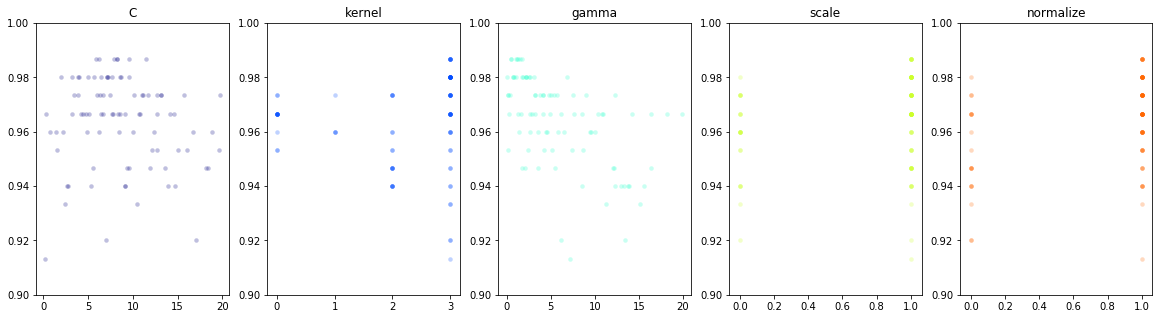

In [9]:
parameters = ['C', 'kernel', 'gamma', 'scale', 'normalize']
cols = len(parameters)
f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(20,5))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    xs, ys = zip(*sorted(zip(xs, ys)))
    axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.25, c=cmap(float(i)/len(parameters)))
    axes[i].set_title(val)
    axes[i].set_ylim([0.9, 1.0])

### 决策树
我们将尝试只优化决策树的一些参数,码如下。

In [10]:
from sklearn.tree import DecisionTreeClassifier


def hyperopt_train_test(params):
    X_ = X[:]
    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
        del params['normalize']

    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
        del params['scale']
    clf = DecisionTreeClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4dt = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'scale': hp.choice('scale', [0, 1]),
    'normalize': hp.choice('normalize', [0, 1])
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4dt, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:',best)

100%|█| 100/100 [00:01<00:00, 54.98it/s, best loss: -0.97333333
best: {'criterion': 0, 'max_depth': 2, 'max_features': 3, 'normalize': 0, 'scale': 0}


### Random Forests
让我们看看 ensemble 的分类器 随机森林，它只是一组决策树的集合。

In [11]:
from sklearn.ensemble import RandomForestClassifier

def hyperopt_train_test(params):
    X_ = X[:]
    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
        del params['normalize']
    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
        del params['scale']
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'scale': hp.choice('scale', [0, 1]),
    'normalize': hp.choice('normalize', [0, 1])
}

best = 0
def f(params):
    global best
    acc = hyperopt_train_test(params)
    if acc > best:
        best = acc
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

100%|█| 100/100 [00:11<00:00,  8.92it/s, best loss: -0.97333333
best:
{'criterion': 1, 'max_depth': 14, 'max_features': 2, 'n_estimators': 0, 'normalize': 0, 'scale': 0}


同样的我们得到 97.3 % 的正确率 ， 和decision tree 的结果一致.

### All  Together Now

一次自动调整一个模型的参数（例如，SVM或KNN）既有趣又有启发性，但如果一次调整所有模型参数并最终获得最佳模型更为有用。 这使我们能够一次比较所有模型和所有参数，从而为我们提供最佳模型。

In [12]:
from sklearn.naive_bayes import BernoulliNB 

def hyperopt_train_test(params):
    t = params['type']
    del params['type']
    if t == 'naive_bayes':
        clf = BernoulliNB(**params)
    elif t == 'svm':
        clf = SVC(**params)
    elif t == 'dtree':
        clf = DecisionTreeClassifier(**params)
    elif t == 'knn':
        clf = KNeighborsClassifier(**params)
    else:
        return 0
    return cross_val_score(clf, X, y).mean()

space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
        'alpha': hp.uniform('alpha', 0.0, 2.0)
    },
    {
        'type': 'svm',
        'C': hp.uniform('C', 0, 10.0),
        'kernel': hp.choice('kernel', ['linear', 'rbf']),
        'gamma': hp.uniform('gamma', 0, 20.0)
    },
    {
        'type': 'randomforest',
        'max_depth': hp.choice('max_depth', range(1,20)),
        'max_features': hp.choice('max_features', range(1,5)),
        'n_estimators': hp.choice('n_estimators', range(1,20)),
        'criterion': hp.choice('criterion', ["gini", "entropy"]),
        'scale': hp.choice('scale', [0, 1]),
        'normalize': hp.choice('normalize', [0, 1])
    },
    {
        'type': 'knn',
        'n_neighbors': hp.choice('knn_n_neighbors', range(1,50))
    }
])

count = 0
best = 0
def f(params):
    global best, count
    count += 1
    acc = hyperopt_train_test(params.copy())
    if acc > best:
        print ('new best:', acc, 'using', params['type'])
        best = acc
    if count % 50 == 0:
        print ('iters:', count, ', acc:', acc, 'using', params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=50, trials=trials)
print('best:')
print(best)

new best:                                                      
0.9333333333333333                                             
using                                                          
knn                                                            
new best:                                                      
0.9733333333333334                                             
using                                                          
svm                                                            
new best:                                                      
0.9800000000000001                                             
using                                                          
svm                                                            
new best:                                                      
0.9866666666666667                                             
using                                                          
svm                                     